In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

In [122]:
df=pd.read_csv('emissions.csv')
df=df.dropna(how='any')
id=df['id']
df=df.drop(columns=['efid','id'])
df

,salesArea,score,scoreAlt,smartwayScore,standard,stdText
0,3,1.0,-1.0,-1,B9,BIN 9
1,7,1.0,-1.0,-1,L1,LEV
2,3,1.0,-1.0,-1,B9,BIN 9
3,7,1.0,-1.0,-1,L1,LEV
4,3,1.0,-1.0,-1,B9,BIN 9
...,...,...,...,...,...,...
33529,3,7.0,-1.0,2,T3B30,Federal Tier 3 Bin 30
33530,3,7.0,-1.0,2,T3B30,Federal Tier 3 Bin 30
33531,7,7.0,-1.0,2,L3SULEV30,LEV-III SULEV30
33532,7,7.0,-1.0,2,L3SULEV30,LEV-III SULEV30


In [123]:
df['scoreAlt'].unique()

array([-1.,  5.,  1.,  2.,  6.])

In [124]:
df['smartwayScore'].unique()

array([-1,  1,  2])

In [125]:
df['standard'].unique()

array(['B9', 'L1', 'U1', 'B8', 'B5', 'S2', 'T1', 'L2', 'B7', 'U2', 'LEV',
       'B10', 'S1', 'SLEV', 'B3', 'ULEV', 'B4', 'B2', 'L2OP', 'B1', 'ZEV',
       'PZEV', 'L3LEV160', 'L3SULEV30', 'L3ULEV125', 'L3ULEV70',
       'L2ULEV125', 'L3SULEV30/TZEV', 'L2SULEV30/PZ', 'L3SULEV30/PZ',
       'OT', 'T3B125', 'T3B70', 'T3B85', 'T3B110', 'T3B30', 'T3B0', 'B6',
       'S2/TZEV', 'L3SULEV30/PZEV', 'T3B160', 'L2LEV160', 'L3ULEV50',
       'L2SULEV30/PZEV', 'T3B50', 'L2SULEV30/TZEV'], dtype=object)

In [126]:
df['stdText'].unique()

array(['BIN 9', 'LEV', 'ULEV', 'BIN 8', 'BIN 5', 'SULEV II', 'Tier 1',
       'LEV II', 'BIN 7', 'ULEV II', 'Bin 9', 'LEV-II SULEV', 'BIN 10',
       'SULEV', 'BIN 3', 'Bin 5', 'BIN 4', 'Bin 8', 'LEV-II ULEV',
       'LEV-II LEV', 'Bin 10', 'BIN 2', 'Bin 2', 'Bin 4',
       'LEV II Optional', 'BIN 1', 'ZEV', 'Bin 3', 'PZEV', 'Bin 1',
       'LEV-III LEV160', 'LEV-III SULEV30', 'LEV-III ULEV125',
       'LEV-III ULEV70', 'LEV-II ULEV125',
       'California LEV-III SULEV30/PZEV', 'Other',
       'Federal Tier 3 Bin 125', 'Federal Tier 3 Bin 70',
       'Federal Tier 3 Transitional Bin 85',
       'Federal Tier 3 Transitional Bin 110', 'Federal Tier 3 Bin 30',
       'Federal Tier 3 Bin 0', 'Bin 6', 'Federal Tier 3 Bin 160',
       'California LEV-III SULEV30/TZEV', 'California LEV-II LEV160',
       'California LEV-III ULEV50', 'Federal Tier 3 Bin 50',
       'California LEV-II SULEV30/TZEV'], dtype=object)

In [127]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['standard']=le.fit_transform(df['standard'])
df['stdText']=le.fit_transform(df['stdText'])

In [128]:
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
df['scoreAlt']=le1.fit_transform(df['scoreAlt'])
df['smartwayScore']=le1.fit_transform(df['smartwayScore'])


In [129]:
df['standard'].unique()

array([ 9, 10, 42,  8,  5, 30, 33, 11,  7, 43, 26,  1, 29, 32,  3, 44,  4,
        2, 13,  0, 45, 28, 18, 19, 23, 25, 17, 22, 14, 20, 27, 36, 40, 41,
       35, 38, 34,  6, 31, 21, 37, 12, 24, 15, 39, 16])

In [130]:
df['stdText'].unique()

array([ 8, 31, 47,  7,  5, 45, 46, 32,  6, 48, 17, 35,  1, 44,  3, 14,  4,
       16, 36, 34, 10,  2, 11, 13, 33,  0, 49, 12, 43,  9, 38, 39, 40, 41,
       37, 20, 42, 24, 28, 30, 29, 26, 23, 15, 25, 21, 18, 22, 27, 19])

In [131]:
df


,salesArea,score,scoreAlt,smartwayScore,standard,stdText
0,3,1.0,0,0,9,8
1,7,1.0,0,0,10,31
2,3,1.0,0,0,9,8
3,7,1.0,0,0,10,31
4,3,1.0,0,0,9,8
...,...,...,...,...,...,...
33529,3,7.0,0,2,38,26
33530,3,7.0,0,2,38,26
33531,7,7.0,0,2,19,39
33532,7,7.0,0,2,19,39


In [132]:
X=df.iloc[:,:-2].values
y=df.iloc[:,-2].values
z=df.iloc[:,-1].values

In [133]:
X

array([[3., 1., 0., 0.],
       [7., 1., 0., 0.],
       [3., 1., 0., 0.],
       ...,
       [7., 7., 0., 2.],
       [7., 7., 0., 2.],
       [3., 7., 0., 2.]])

In [134]:
y

array([ 9, 10,  9, ..., 19, 19, 38])

In [135]:
z

array([ 8, 31,  8, ..., 39, 39, 26])

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.25 ,random_state = 1)

In [138]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, z_train,z_test = train_test_split(X, z, test_size = 0.25 ,random_state = 1)

In [139]:
y_train=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)
z_train=tf.keras.utils.to_categorical(z_train)
z_test=tf.keras.utils.to_categorical(z_test)


In [140]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=50,activation='relu'))
ann.add(tf.keras.layers.Dense(units=100,activation='relu'))
ann.add(tf.keras.layers.Dense(units=150,activation='relu'))
ann.add(tf.keras.layers.Dense(units=200,activation='relu'))
ann.add(tf.keras.layers.Dense(units=46,activation='softmax'))

In [143]:
ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = ann.fit(X_train, y_train, batch_size=15, epochs=100,validation_data=(X_test, y_test))
ann.save("FC.h5")

Epoch 1/100
1676/1676 [==============================] - 4s 2ms/step - loss: 1.4020 - accuracy: 0.6426 - val_loss: 0.6650 - val_accuracy: 0.8068
Epoch 2/100
1676/1676 [==============================] - 3s 2ms/step - loss: 0.6970 - accuracy: 0.7874 - val_loss: 0.6046 - val_accuracy: 0.8211
Epoch 3/100
1676/1676 [==============================] - 3s 2ms/step - loss: 0.6390 - accuracy: 0.7985 - val_loss: 0.5806 - val_accuracy: 0.8215
Epoch 4/100
1676/1676 [==============================] - 4s 2ms/step - loss: 0.6061 - accuracy: 0.8114 - val_loss: 0.5998 - val_accuracy: 0.8146
Epoch 5/100
1676/1676 [==============================] - 4s 2ms/step - loss: 0.5984 - accuracy: 0.8094 - val_loss: 0.5491 - val_accuracy: 0.8323
Epoch 6/100
1676/1676 [==============================] - 3s 2ms/step - loss: 0.5898 - accuracy: 0.8084 - val_loss: 0.5554 - val_accuracy: 0.8135
Epoch 7/100
1676/1676 [==============================] - 4s 2ms/step - loss: 0.5813 - accuracy: 0.8123 - val_loss: 0.5354 - val_ac

In [144]:
ann1 = tf.keras.models.Sequential()
ann1.add(tf.keras.layers.Dense(units=50,activation='relu'))
ann1.add(tf.keras.layers.Dense(units=100,activation='relu'))
ann1.add(tf.keras.layers.Dense(units=150,activation='relu'))
ann1.add(tf.keras.layers.Dense(units=200,activation='relu'))
ann1.add(tf.keras.layers.Dense(units=50,activation='softmax'))

In [145]:
ann1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history1 = ann1.fit(X_train1, z_train, batch_size=15, epochs=100,validation_data=(X_test1, z_test))
ann1.save("FC1.h5")

Epoch 1/100
1676/1676 [==============================] - 4s 2ms/step - loss: 1.8363 - accuracy: 0.3985 - val_loss: 1.1481 - val_accuracy: 0.5457
Epoch 2/100
1676/1676 [==============================] - 3s 2ms/step - loss: 1.1573 - accuracy: 0.5231 - val_loss: 1.1426 - val_accuracy: 0.5320
Epoch 3/100
1676/1676 [==============================] - 4s 2ms/step - loss: 1.0764 - accuracy: 0.5375 - val_loss: 1.0302 - val_accuracy: 0.5447
Epoch 4/100
1676/1676 [==============================] - 4s 2ms/step - loss: 1.0551 - accuracy: 0.5462 - val_loss: 1.0151 - val_accuracy: 0.5741
Epoch 5/100
1676/1676 [==============================] - 4s 2ms/step - loss: 1.0395 - accuracy: 0.5538 - val_loss: 0.9978 - val_accuracy: 0.5714
Epoch 6/100
1676/1676 [==============================] - 3s 2ms/step - loss: 1.0184 - accuracy: 0.5577 - val_loss: 0.9992 - val_accuracy: 0.5681
Epoch 7/100
1676/1676 [==============================] - 4s 2ms/step - loss: 1.0081 - accuracy: 0.5685 - val_loss: 1.0038 - val_ac

Saved Model & Graph to disk


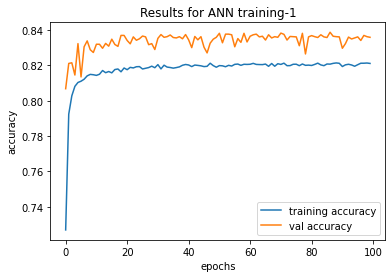

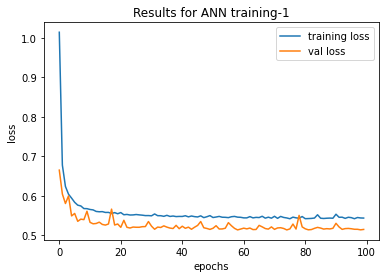

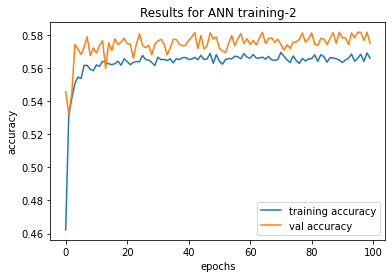

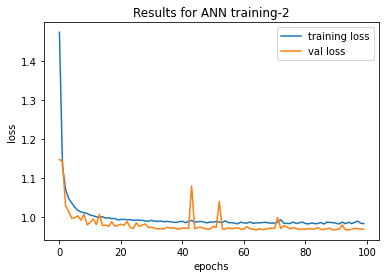

In [146]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.title('Results for ANN training-1')
plt.savefig('Accuracy.png')

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title('Results for ANN training-1')
plt.savefig('Loss.png')

plt.figure(2)
plt.plot(history1.history['accuracy'], label='training accuracy')
plt.plot(history1.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.title('Results for ANN training-2')
plt.savefig('Accuracy.png')

plt.figure(3)
plt.plot(history1.history['loss'], label='training loss')
plt.plot(history1.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title('Results for ANN training-2')
plt.savefig('Loss.png')

print("Saved Model & Graph to disk")

In [147]:
model = tf.keras.models.load_model('FC.h5')
model1= tf.keras.models.load_model('FC1.h5')
print("Loaded model from disk")

Loaded model from disk


In [150]:
z_pred=model1.predict(X_test)
z_pred=np.round(z_pred)
np.set_printoptions(precision=2)
print(z_pred)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [151]:
from sklearn.metrics import accuracy_score
print("Accuracy Score for the algorithm=>{}%".format(round(accuracy_score(z_test,z_pred)*100),2))

Accuracy Score for the algorithm=>44%


In [148]:
y_pred= model.predict(X_test)
y_pred=np.round(y_pred)
np.set_printoptions(precision=2)
print(y_pred)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [149]:
from sklearn.metrics import accuracy_score
print("Accuracy Score for the algorithm=>{}%".format(round(accuracy_score(y_test,y_pred)*100),2))

Accuracy Score for the algorithm=>81%
